In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, f1_score, precision_score, recall_score 

from sklearn.naive_bayes import GaussianNB

from skopt import BayesSearchCV

import matplotlib.pyplot as plt


In [2]:
import seaborn as sns

In [3]:
data = pd.read_csv("../Datasets/training_df_raw.csv")
data.fillna(0, inplace=True)
data.drop(['date', 'time'], axis=1, inplace=True)

In [4]:
X = data.drop('fire', axis=1)
y = data['fire']

In [5]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [ ]:
print("Naive Bayes Model")
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

Naive Bayes Model


GaussianNB()

In [ ]:
y_train_pred_nb = nb_model.predict(X_train)
train_acc_nb = accuracy_score(y_train, y_train_pred_nb)
print(f"Training Accuracy: {train_acc_nb:.4f}")

Training Accuracy: 0.5292


In [ ]:
y_pred_nb = nb_model.predict(X_test)

Confusion Matrix for Naive Bayes:


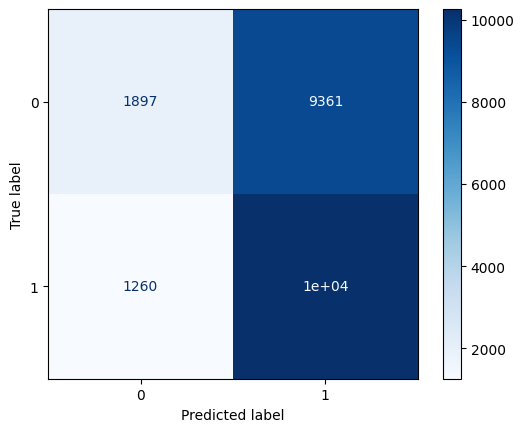

In [ ]:
print("Confusion Matrix for Naive Bayes:")
conf_mat_nb = confusion_matrix(y_test, y_pred_nb)
ConfusionMatrixDisplay(confusion_matrix=conf_mat_nb).plot(cmap=plt.cm.Blues)
plt.show()

In [12]:
print("Classification Metrics for Naive Bayes:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_nb):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_nb):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_nb):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred_nb):.4f}")

Classification Metrics for Naive Bayes:
Accuracy: 0.5338
Precision: 0.5230
Recall: 0.8906
F1 Score: 0.6590


In [ ]:
print("Classification Report for Naive Bayes:")
print(classification_report(y_test, y_pred_nb))

Classification Report for Naive Bayes:
              precision    recall  f1-score   support

           0       0.60      0.17      0.26     11258
           1       0.52      0.89      0.66     11522

    accuracy                           0.53     22780
   macro avg       0.56      0.53      0.46     22780
weighted avg       0.56      0.53      0.46     22780



In [ ]:
param_space_nb = {
    'var_smoothing': (1e-10, 1e-2, 'log-uniform')
}

bayes_search_nb = BayesSearchCV(
    estimator=GaussianNB(),
    search_spaces=param_space_nb,
    n_iter=50,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    random_state=42
)
bayes_search_nb.fit(X_train, y_train)

c:\Users\kavir\anaconda3\envs\rissi_envi\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [2.1647689075627765e-10] before, using random point [3.2256492639829156e-05]
  warnings.warn(
c:\Users\kavir\anaconda3\envs\rissi_envi\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [7.782695997538567e-10] before, using random point [4.935310868008654e-10]
  warnings.warn(
c:\Users\kavir\anaconda3\envs\rissi_envi\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [1.1348999073733537e-08] before, using random point [2.1500425488187653e-07]
  warnings.warn(
c:\Users\kavir\anaconda3\envs\rissi_envi\Lib\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [5.210731434209367e-09] before, using random point [3.523628399139671e-06]
  warnings.warn(
c:\Users\kavir\anaconda3\envs\rissi_

BayesSearchCV(cv=5, estimator=GaussianNB(), n_jobs=-1, random_state=42,
              scoring='accuracy',
              search_spaces={'var_smoothing': (1e-10, 0.01, 'log-uniform')})

In [ ]:
best_nb = bayes_search_nb.best_estimator_
y_pred_nb_tuned = best_nb.predict(X_test)

In [ ]:
print("Metrics after Bayesian Optimization for Naive Bayes:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_nb_tuned):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_nb_tuned):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_nb_tuned):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred_nb_tuned):.4f}")

Metrics after Bayesian Optimization for Naive Bayes:
Accuracy: 0.5338
Precision: 0.5230
Recall: 0.8906
F1 Score: 0.6590


Confusion Matrix for Naive Bayes after tuning:


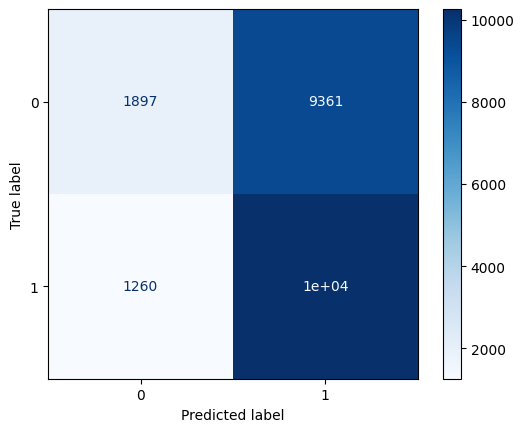

In [ ]:
print("Confusion Matrix for Naive Bayes after tuning:")
conf_mat_nb_tuned = confusion_matrix(y_test, y_pred_nb_tuned)
ConfusionMatrixDisplay(confusion_matrix=conf_mat_nb_tuned).plot(cmap=plt.cm.Blues)
plt.show()

In [18]:
print("Classification Report for Naive Bayes after tuning:")
print(classification_report(y_test, y_pred_nb_tuned))

Classification Report for Naive Bayes after tuning:
              precision    recall  f1-score   support

           0       0.60      0.17      0.26     11258
           1       0.52      0.89      0.66     11522

    accuracy                           0.53     22780
   macro avg       0.56      0.53      0.46     22780
weighted avg       0.56      0.53      0.46     22780



In [ ]:
cv_scores_nb = cross_val_score(best_nb, X_train, y_train, cv=5, scoring='accuracy')
print(f"Cross-Validation Scores for Naive Bayes: {cv_scores_nb}")

Cross-Validation Scores for Naive Bayes: [0.51838235 0.51753279 0.57712781 0.5398672  0.52861768]


In [ ]:
print(f"Best Cross-Validation Score for Naive Bayes: {cv_scores_nb.max():.4f}")

Best Cross-Validation Score for Naive Bayes: 0.5771


Naive Bayes AUC-ROC Score: 0.6061


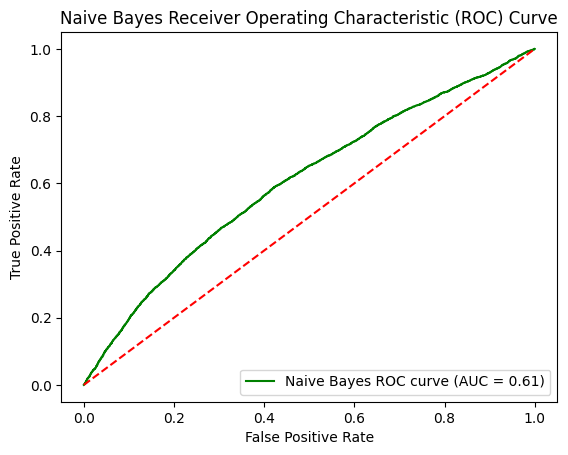

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

y_scores_nb = best_nb.predict_proba(X_test)[:, 1]  

auc_score_nb = roc_auc_score(y_test, y_scores_nb)
print(f"Naive Bayes AUC-ROC Score: {auc_score_nb:.4f}")

fpr_nb, tpr_nb, _ = roc_curve(y_test, y_scores_nb)

plt.figure()
plt.plot(fpr_nb, tpr_nb, color='green', label=f'Naive Bayes ROC curve (AUC = {auc_score_nb:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--') 
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Naive Bayes Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()
